kaggle link
https://www.kaggle.com/datasets/denkuznetz/traffic-accident-prediction

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2> loading data in </h2>

In [28]:
data = pd.read_csv('dataset_traffic_accident_prediction1.csv')

In [29]:
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


<h2> Processing data</h2>

working out total null values within each column

In [30]:
for column in data.columns:
    print(f"{column} total null values: {sum(data[column].isnull())}")

Weather total null values: 42
Road_Type total null values: 42
Time_of_Day total null values: 42
Traffic_Density total null values: 42
Speed_Limit total null values: 42
Number_of_Vehicles total null values: 42
Driver_Alcohol total null values: 42
Accident_Severity total null values: 42
Road_Condition total null values: 42
Vehicle_Type total null values: 42
Driver_Age total null values: 42
Driver_Experience total null values: 42
Road_Light_Condition total null values: 42
Accident total null values: 42


removing null values

In [31]:
data = data.dropna()

In [32]:
#converting columns into a integer and not a float
data['Driver_Age'] = data['Driver_Age'].astype(int)
data['Number_of_Vehicles'] = data['Number_of_Vehicles'].astype(int)
data['Driver_Experience'] = data['Driver_Experience'].astype(int)
data['Driver_Alcohol'] = data['Driver_Alcohol'].astype(int)
data['Traffic_Density'] = data['Traffic_Density'].astype(int)
data['Accident'] = data['Accident'].astype(int)

In [33]:
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,Rainy,Highway,Evening,1,60.0,4,0,Low,Icy,Car,54,52,Artificial Light,0
3,Clear,City Road,Afternoon,2,60.0,3,0,Low,Under Construction,Bus,34,31,Daylight,0
4,Rainy,Highway,Morning,1,195.0,11,0,Low,Dry,Car,62,55,Artificial Light,1
6,Foggy,Highway,Afternoon,0,60.0,4,0,Low,Dry,Truck,27,26,Daylight,1
7,Rainy,City Road,Afternoon,0,60.0,4,0,Low,Dry,Car,29,22,Artificial Light,1


<h2 style="text-align:center;"> data visualisation/understanding</h2>

<h3 >Sorting out age into categories </h3>

working out min and max in age

In [34]:
print("Minimum age: ",data['Driver_Age'].min())
print("Maximum age: ",data['Driver_Age'].max())

Minimum age:  18
Maximum age:  69


In [40]:
bins=[18,25,35,45,55,69]
ageGroupLabels = ['18-25','26-35','36-45','46-55','56-69']

ageGroups = pd.cut(data['Driver_Age'], bins)

print(ageGroups.value_counts())

print(data['bins'].unique())


Driver_Age
(55, 69]    112
(25, 35]     83
(45, 55]     80
(35, 45]     73
(18, 25]     52
Name: count, dtype: int64
[(45.0, 55.0], (25.0, 35.0], (55.0, 69.0], (35.0, 45.0], NaN, (18.0, 25.0]]
Categories (5, interval[int64, right]): [(18, 25] < (25, 35] < (35, 45] < (45, 55] < (55, 69]]


<h3>Plotting the data</h3>

Text(0.5, 1.0, 'Weather distribution')

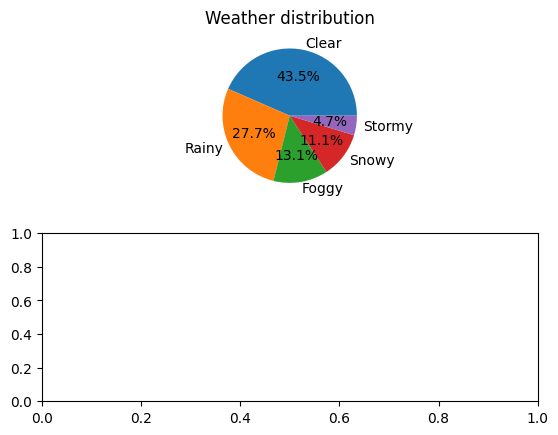

In [41]:
#working out the proportion of each type of condiction

fig,ax = plt.subplots(2)

wordLabels = ["Clear","Rainy","Foggy","Snowy","Stormy"]
totalWordArr = np.array([]).astype(int)

ageLabels = np.array([]).astype(int)
ageArr = np.array([]).astype(int)
ageTotal = np.array([]).astype(int)

for word in wordLabels:
    totalWordArr = np.append(totalWordArr,sum((data['Weather'] == word) == True))
    #print(f"Total amount of rows for {word} {sum((data['Weather'] == word) == True)}")


ax[0].pie(totalWordArr, labels=wordLabels, autopct="%1.1f%%")
ax[0].set_title("Weather distribution")

In [26]:
np.size??

Signature:       np.size(a, axis=None)
Call signature:  np.size(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function size at 0x7cdfb40ab2e0>
File:            ~/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py
Source:         
@array_function_dispatch(_size_dispatcher)
def size(a, axis=None):
    """
    Return the number of elements along a given axis.

    Parameters
    ----------
    a : array_like
        Input data.
    axis : int, optional
        Axis along which the elements are counted.  By default, give
        the total number of elements.

    Returns
    -------
    element_count : int
        Number of elements along the specified axis.

    See Also
    --------
    shape : dimensions of array
    ndarray.shape : dimensions of array
    ndarray.size : number of elements in array

    Examples
    --------
    >>> import numpy as np
    >>> a = np.array([[1,2,3],[4,5,6]])
    >>> np.size(a)
    6
    >>> np.size(a,1)
    3
  

In [10]:
print(data["Driver_Age"].describe)

<bound method NDFrame.describe of 2      54
3      34
4      62
6      27
7      29
       ..
830    56
835    23
836    52
838    25
839    29
Name: Driver_Age, Length: 405, dtype: int64>
